In [1]:
# pip install pykrx

Note: you may need to restart the kernel to use updated packages.


### PyKrx 
#### 웹사이트 ( Naver / KRX ) 에서 주가 정보를 스크래핑 하기 위한 모듈

유가 증권시장의 주식 정보를 스크래핑한다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from pykrx import stock

#### Stock 모듈
#####  * MarketData API
코스피 종목의 주가 관련 정보를 얻는 API

##### 인덱스 조회 API

In [10]:
# get_index_ticker_list
#   : 디폴트로 코스피 인덱스를 리스트로 반환한다. 
tickers = stock.get_index_ticker_list("20170701", market = "KOSPI")

for ticker in tickers:
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 은행
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수


In [11]:
# 인덱스 OHLCV 조회
# Open-high-low-close chart
df_kosdaq = stock.get_index_ohlcv_by_date("20170701", "20210709", "2001")

df_kosdaq.head()

,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2017-07-03,671.17,671.17,660.04,660.97,560800279,2767993614652
2017-07-04,662.17,663.85,654.06,656.19,735098357,3093417038951
2017-07-05,657.70,661.58,657.69,661.54,565075413,2687623160188
2017-07-06,663.79,665.05,662.67,663.79,555479206,2503114650514
2017-07-07,662.66,664.29,660.99,663.77,551549077,2598020071964


#### 종목 조회 API

In [19]:
# get_market_ticker_list
#   : 지정한 일자의 코스피 시장에 상장된 ticker(증권시세표시기)를 리스트로 반환한다.
# market option
#   : 조회 시장을 지정. default - KOSPI
#     ( KOSPI, KOSDAQ, KONEX, ALL 지정 가능)
tickers = stock.get_market_ticker_list("20180201", market = "KOSPI")
tickers

['095570',
 '068400',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '037560',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '004840',
 '155660',
 '069730',
 '017940',
 '007700',
 '114090',
 '078930',
 '006360',
 '001250',
 '007070',
 '078935',
 '003560',
 '175330',
 '234080',
 '001060',
 '001067',
 '001065',
 '096760',
 '105560',
 '002380',
 '009070',
 '009440',
 '119650',
 '092220',
 '109070',
 '001390',
 '001940',
 '083420',
 '025000',
 '092230',
 '000040',
 '044450',
 '030200',
 '033780',
 '030210',
 '058850',
 '093050',
 '003550',
 '034220',
 '001120',
 '051900',
 '051905',
 '003555',
 '032640',
 '011070',
 '066570',
 '066575',
 '108670',
 '108675',
 '051910',
 '051915',
 '079550',
 '006260',
 '000680',
 '010120',
 '229640',
 '023150',
 '035420',
 '181710',
 '005940',
 '005945',
 '034310',
 '008260',
 '004250',
 '004255',
 '010060',
 '005490',

In [22]:
names = []
for ticker in tickers:
    name = stock.get_market_ticker_name(ticker)
    names.append(name)
    
tickers[names.index("SK케미칼")]

'285130'

In [21]:
tickers[517]

'096530'

In [23]:
# 일자별 OHLCV 조회
df_seegene = stock.get_market_ohlcv_by_date("20170701", "20210709", '285130',
                                            adjusted = False)
df_seegene.head()

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2018-01-05,111000,114000,93500,107500,1282241,132037458500,-3.15
2018-01-08,109000,109000,99800,101000,533640,54689046800,-6.05
2018-01-09,102500,119500,101500,116000,782363,86787261000,14.85
2018-01-10,116000,121000,112000,114000,357741,41370432500,-1.72
2018-01-11,114500,118000,112000,114000,194223,22245757000,0.00


In [56]:
# 해당 종목의 DIV/BPS/PER/EPS
# DIV : division 현재주당배당금 
# BPS : book value per share 주당순자산가치
# PER : price earning ratio 주가수익비율 (주당 주가 / 주당순이익(eps))
# EPS : earning per share 주당 순이익

df_fund = stock.get_market_fundamental_by_date("20170701", "20210709", '285130')
df_fund.tail()

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2021-07-05,12362,8.46,6.65,9712,1.82,1500
2021-07-06,12362,8.12,6.38,9712,1.90,1500
2021-07-07,12362,9.25,7.26,9712,1.67,1500
2021-07-08,12362,9.32,7.32,9712,1.66,1500
2021-07-09,12362,9.06,7.12,9712,1.70,1500


In [24]:
# 일자별 시가 총액 조회
df_cap = stock.get_market_cap_by_date("20170701", "20210709", '096530')
df_cap.head()

,시가총액,거래량,거래대금,상장주식수
날짜,,,,
2017-07-03,974593843000,63795,2392759500,26234020
2017-07-04,949671524000,107515,3933213250,26234020
2017-07-05,954918328000,58843,2136491350,26234020
2017-07-06,950983225000,60155,2190629050,26234020
2017-07-07,956230029000,66003,2391826150,26234020


#### Time Series Data Analysis

In [25]:
df_seegene.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2017-07-03 to 2021-07-09
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      989 non-null    int32  
 1   고가      989 non-null    int32  
 2   저가      989 non-null    int32  
 3   종가      989 non-null    int32  
 4   거래량     989 non-null    int32  
 5   거래대금    989 non-null    int64  
 6   등락률     989 non-null    float32
dtypes: float32(1), int32(5), int64(1)
memory usage: 38.6 KB


1) 각 연도별 분기별 거래량 평균과 종가 평균 출력

In [26]:
df_seegene["연도"] = pd.to_datetime(df_seegene.index).year
df_seegene["분기"] = df_seegene.index.to_series().apply(lambda x : "1분기" if 1 <= x.month <= 3 else "2분기" if 4 <= x.month <= 6 else "3분기" if 7<= x.month <= 9 else "4분기")

In [27]:
pd.pivot_table(data = df_seegene, index = ["연도","분기"], values = ["종가", "거래량"], aggfunc = np.mean)

거래량             종가
연도   분기                              
2017 3분기  1.836379e+05   30795.312500
     4분기  1.709651e+05   30431.578947
2018 1분기  2.801153e+05   35948.360656
     2분기  1.230898e+05   33091.666667
     3분기  9.750449e+04   25889.344262
     4분기  1.590264e+05   18351.612903
2019 1분기  1.911828e+05   19939.830508
     2분기  1.643656e+05   25435.483871
     3분기  1.046876e+05   22738.888889
     4분기  2.162618e+05   25059.677419
2020 1분기  4.535977e+06   44970.967742
     2분기  3.504672e+06  102745.901639
     3분기  2.900177e+06  230829.687500
     4분기  1.088786e+06  232134.426230
2021 1분기  5.626312e+05  155878.333333
     2분기  1.587459e+06  100788.888889
     3분기  5.214452e+06   85557.142857

2) 각 거래일의 거래량이 전날 거래량보다 증가한 경우를 찾기

In [28]:
df_seegene["전날거래량"] = df_seegene["거래량"].shift(1)

cond = df_seegene["거래량"] > df_seegene["전날거래량"]
df_cond = df_seegene[cond]
df_cond.head()

,시가,고가,저가,종가,거래량,거래대금,등락률,연도,분기,전날거래량
날짜,,,,,,,,,,
2017-07-04,37350,37350,36100,36200,107515,3933213250,-2.56,2017,3분기,63795.0
2017-07-06,36450,36850,36000,36250,60155,2190629050,-0.41,2017,3분기,58843.0
2017-07-07,36000,36500,35900,36450,66003,2391826150,0.55,2017,3분기,60155.0
2017-07-11,36550,36550,35000,35100,107734,3809909250,-3.17,2017,3분기,44373.0
2017-07-13,35100,35550,34850,35100,112517,3948207850,-0.43,2017,3분기,89795.0


전날 거래량보다 증가한 경우 연도 및 분기별 평균 거래량 추출

In [30]:
pd.pivot_table(data = df_cond, index = ["분기", "연도"], values = "거래량", aggfunc = np.mean)

거래량
분기  연도                
1분기 2018  3.733400e+05
    2019  2.400685e+05
    2020  6.495687e+06
    2021  6.905037e+05
2분기 2018  1.472749e+05
    2019  2.205299e+05
    2020  4.562092e+06
    2021  2.216637e+06
3분기 2017  2.339588e+05
    2018  1.166412e+05
    2019  1.220169e+05
    2020  4.019660e+06
    2021  6.371234e+06
4분기 2017  2.116839e+05
    2018  1.889806e+05
    2019  2.597511e+05
    2020  1.331526e+06

3) 이동평균선

3-1) 5일 주가 이동평균선

In [31]:
df_seegene["5일MA"] = df_seegene["종가"].rolling(window=5).mean()

3-2) 20일 주가 이동평균선

In [32]:
df_seegene["20일MA"] = df_seegene["종가"].rolling(window=20).mean()

In [33]:
df_seegene.head()

,시가,고가,저가,종가,거래량,거래대금,등락률,연도,분기,전날거래량,5일MA,20일MA
날짜,,,,,,,,,,,,
2017-07-03,38050,38300,37150,37150,63795,2392759500,-1.59,2017,3분기,NaN,NaN,NaN
2017-07-04,37350,37350,36100,36200,107515,3933213250,-2.56,2017,3분기,63795.0,NaN,NaN
2017-07-05,36200,36500,36050,36400,58843,2136491350,0.55,2017,3분기,107515.0,NaN,NaN
2017-07-06,36450,36850,36000,36250,60155,2190629050,-0.41,2017,3분기,58843.0,NaN,NaN
2017-07-07,36000,36500,35900,36450,66003,2391826150,0.55,2017,3분기,60155.0,36490.0,NaN


4) 시각화

(1) Market Price의 날짜별 Line Plot

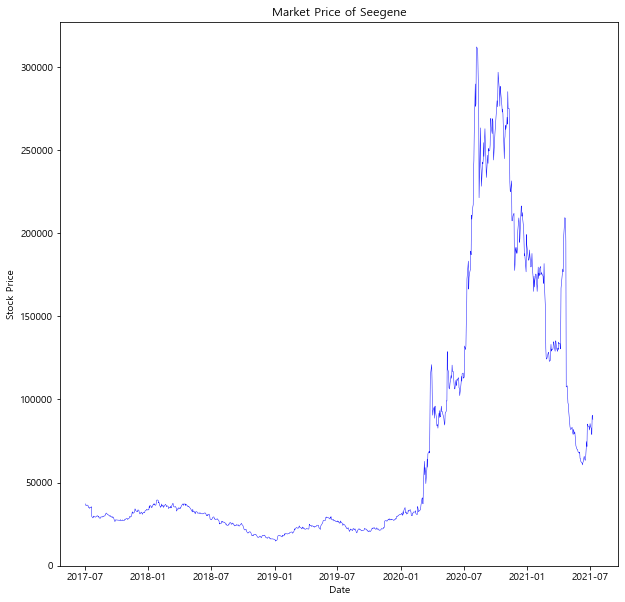

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(df_seegene.index, df_seegene.종가, color="blue", alpha = 0.9, linewidth=0.5)
plt.title("Market Price of Seegene")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

 => seaborn 이용하기

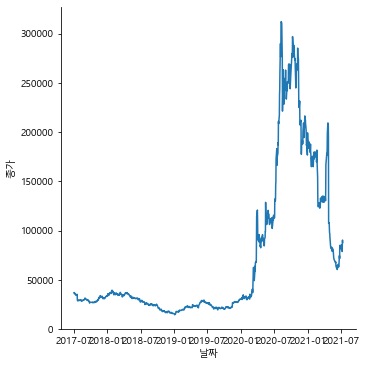

In [35]:
sns.relplot(x = df_seegene.index, y = "종가", kind = "line", data = df_seegene)

(2) 이동평균선 추가하기 (MA5, MA20)

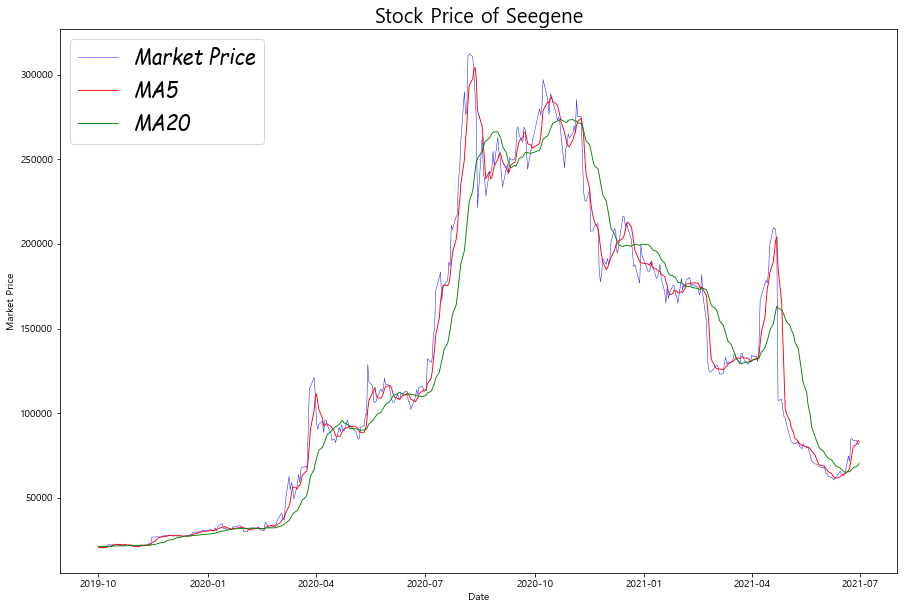

In [36]:
fig, axes = plt.subplots(figsize=(15,10))
data = df_seegene.loc["2019-10-01":"2021-06-30",:]

axes.plot(data.index, data.종가, color="blue", alpha = 0.9, linewidth=0.5, label = "Market Price")
axes.set_title("Stock Price of Seegene", size = 20)
axes.set_xlabel("Date")
axes.set_ylabel("Market Price")

# 이동평균선 
axes.plot(data.index, data["5일MA"], color="red", linewidth=0.9, label = "MA5")
axes.plot(data.index, data["20일MA"], color="green", linewidth=0.9, label = "MA20")

# 범례 조정하기
prop = dict(family = "fantasy", style = "italic", size=20)
config_legend = dict(loc = 2, prop = prop)
axes.legend(**config_legend)

(3) 캔들 스틱 차트

In [40]:
import mpl_finance
import matplotlib.ticker as ticker

Text(0.5, 1.0, 'Candlestick Chart of first quarter in 2020')

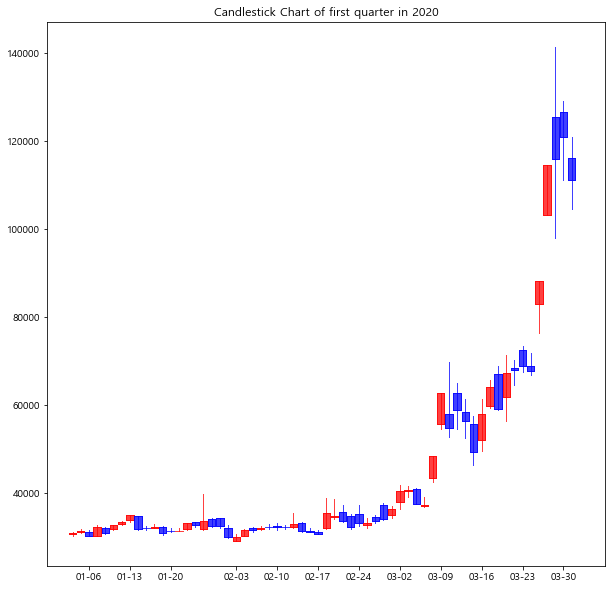

In [41]:
data = df_seegene.loc["2020-01-02":"2020-03-31",:]

fig, axes = plt.subplots(figsize=(10,10))

day_list = []
date_list = []
for i, date in enumerate(data.index):
    if date.dayofweek == 0:
        day_list.append(i)
        date_list.append(date.strftime("%m-%d"))
        

axes.xaxis.set_major_locator(ticker.FixedLocator(day_list))
axes.xaxis.set_major_formatter(ticker.FixedFormatter(date_list))

mpl_finance.candlestick2_ohlc(axes, data["시가"], data["고가"], data["저가"], data["종가"],
                              width = 0.9, colorup="r", colordown="b")

axes.set_title("Candlestick Chart of first quarter in 2020")

(4 )- 1. 분기별 주식 평균 거래량 차트

In [42]:
tb = pd.pivot_table(data = df_seegene, index = ["연도", "분기"], values = "거래량", aggfunc = np.mean)
tb

거래량
연도   분기               
2017 3분기  1.836379e+05
     4분기  1.709651e+05
2018 1분기  2.801153e+05
     2분기  1.230898e+05
     3분기  9.750449e+04
     4분기  1.590264e+05
2019 1분기  1.911828e+05
     2분기  1.643656e+05
     3분기  1.046876e+05
     4분기  2.162618e+05
2020 1분기  4.535977e+06
     2분기  3.504672e+06
     3분기  2.900177e+06
     4분기  1.088786e+06
2021 1분기  5.626312e+05
     2분기  1.587459e+06
     3분기  5.214452e+06

In [43]:
tb.columns

Index(['거래량'], dtype='object')

In [44]:
# tb.index

In [45]:
tb = tb.reset_index()
tb

,연도,분기,거래량
0,2017,3분기,1.836379e+05
1,2017,4분기,1.709651e+05
2,2018,1분기,2.801153e+05
3,2018,2분기,1.230898e+05
4,2018,3분기,9.750449e+04
5,2018,4분기,1.590264e+05
6,2019,1분기,1.911828e+05
7,2019,2분기,1.643656e+05
8,2019,3분기,1.046876e+05
9,2019,4분기,2.162618e+05


Text(0.5, 1.0, '2020 분기별 주식 평균 거래량 차트')

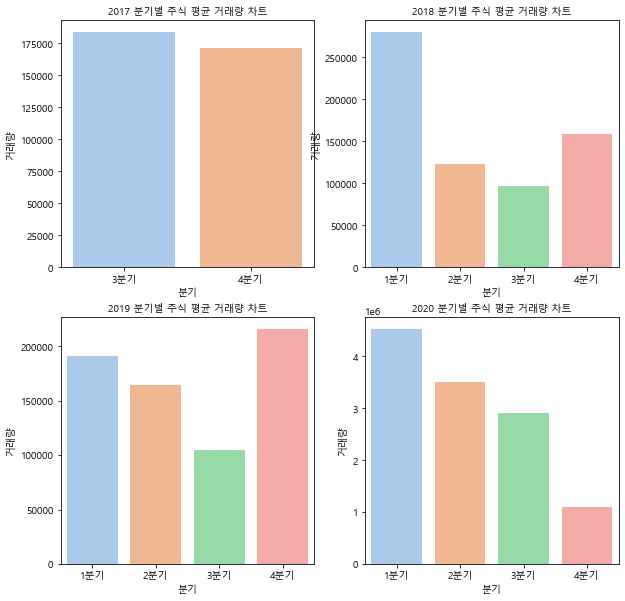

In [75]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

data = tb[tb["연도"] == 2017]
sns.barplot(x = "분기", y = "거래량",data = data, ax = axes[0,0], palette = "pastel")
axes[0,0].set_title("2017 분기별 주식 평균 거래량 차트", size = 10)


data = tb[tb["연도"] == 2018]
sns.barplot(x = "분기", y = "거래량", data = data, ax = axes[0,1], palette = "pastel")
axes[0,1].set_title("2018 분기별 주식 평균 거래량 차트", size = 10)

data = tb[tb["연도"] == 2019]
sns.barplot(x = "분기", y = "거래량",data = data, ax = axes[1,0], palette = "pastel")
axes[1,0].set_title("2019 분기별 주식 평균 거래량 차트", size = 10)

data = tb[tb["연도"] == 2020]
sns.barplot(x = "분기", y = "거래량",data = data, ax = axes[1,1], palette = "pastel")
axes[1,1].set_title("2020 분기별 주식 평균 거래량 차트", size = 10)


(4) - 2. 2020년 거래량 및 PER 차트

2020의 씨젠주의 거래량과 저평가 여부를 판단할 수 있는 PER, 주가의 상태를 알 수 있는 PBR을 하나의 그래프로 보기

그래프의 x축 값을 보기 좋게 해주기 위해 Time index를 pandas형식에 맞게 변형시킴.

In [47]:
df_seegene.index = pd.to_datetime(df_seegene.index)

In [57]:
# 2020년에 대한 데이터 불러오기
df_2020 = df_seegene[df_seegene["연도"] == 2020]

df_fund["year"] = pd.to_datetime(df_fund.index).year
df_2020_fund = df_fund[df_fund["year"] == 2020]

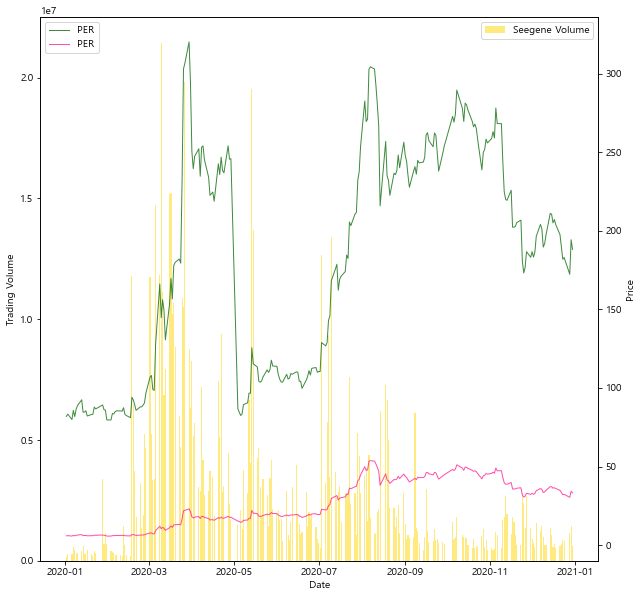

In [87]:
# 차트그리기
fig, axes = plt.subplots(figsize = (10,10))

# 거래량 bar chart
axes.bar(df_2020.index, df_2020['거래량'], label='Seegene Volume', color='gold',alpha=0.5)
axes.set_xlabel("Date")
axes.set_ylabel("Trading Volume")

# PER
axes2 = axes.twinx()
axes2.plot(df_2020_fund.index, df_2020_fund["PER"], label = "PER", color = "darkgreen",
            linewidth = 1, alpha = 0.75)
axes2.set_ylabel("Price")

# PBR
axes2.plot(df_2020_fund.index, df_2020_fund["PBR"], label = "PER", color = "deeppink",
            linewidth = 1, alpha = 0.75)

axes.legend(loc = "upper right")
axes2.legend(loc = "upper left")

##### 데이터 내보내기

In [46]:
df_seegene.to_csv(r'C:\Users\TFG5076XG\T_academy\Crawling\seegene.csv', sep=',', na_rep='NaN')

In [20]:
df_fund.to_excel(r'C:\Users\TFG5076XG\T_academy\Crawling\fund.xlsx', na_rep='NaN')

In [23]:
seegene = pd.concat([df_seegene,df_fund], axis = 1)
seegene.to_excel(r'C:\Users\TFG5076XG\T_academy\Crawling\total.xlsx', na_rep='NaN')